# Data Pre-Processing

Loading all the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the dataset

In [2]:
data = pd.read_csv('spotify_songs.csv')
display(data)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


To clean the dataset, we are removing:
1. songs that are less than 1 minute and more than 7 minutes
2. songs that have a 0 popularity
3. songs that are duplicates
4. columns that are not needed for our analysis

Since all the tracks in the dataset is ranked between 1 and 100 in terms of its popularity, we will classify a song as popular if it is ranked higher than 60 and not popular if it is 60 or lower.

In [3]:
# dataset cleaning
data = data[(data['duration_ms'] > 60000) & (data['duration_ms'] < 420000) & (data['track_popularity'] > 0)]
data = data.drop_duplicates(subset='track_name', keep='first')
removed_columns = ['track_id', 'track_album_id', 'playlist_name', 'playlist_id', 'track_name', 'track_artist', 'track_album_name', 'track_album_release_date', 'playlist_subgenre', 'playlist_genre']
data = data.drop(columns = removed_columns, axis=1)

# adds another column to indicate whether or not a song is popular
data['popular'] = data['track_popularity'] > 60
data = data.drop(columns=['track_popularity'])
display(data)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popular
0,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,True
1,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,True
2,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,True
3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,False
4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,False
32829,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,False
32830,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,False
32831,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,False


As a result, we've narrowed down our dataset from 32833 observations to 21225 observations.

### Data Normalization

Now, we normalize the data using min-max normalization technique to keep the values of the attributes uniform.

In [4]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop('popular', axis = 1)
y = data['popular']

# normalize each field of input using the min-max normalization technique
scaler = MinMaxScaler(feature_range = (0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

# display pre-processed data
print("\nPre-processed data :")
display(X)
print("\nClass :")
display(y)


Pre-processed data :


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.742228,0.915985,0.545455,0.918090,1.0,0.040085,0.102821,0.000000,0.056813,0.522700,0.424386,0.373907
1,0.717889,0.814968,1.000000,0.869162,1.0,0.016637,0.072983,0.004235,0.353063,0.699291,0.316209,0.284391
2,0.661467,0.930988,0.090909,0.901368,0.0,0.057838,0.080039,0.000023,0.102210,0.618563,0.434054,0.323411
3,0.709039,0.929988,0.636364,0.894118,1.0,0.088879,0.028930,0.000009,0.197676,0.279508,0.423994,0.302467
4,0.633809,0.832971,0.090909,0.875385,1.0,0.015074,0.080946,0.000000,0.075093,0.731582,0.433897,0.358033
...,...,...,...,...,...,...,...,...,...,...,...,...
21220,0.388207,0.921986,0.181818,0.935272,1.0,0.079500,0.077216,0.000000,0.058336,0.211899,0.454460,0.400692
21221,0.492200,0.785963,0.000000,0.879785,1.0,0.021885,0.001722,0.004296,0.371344,0.403627,0.453827,0.814793
21222,0.499945,0.820969,0.545455,0.870628,0.0,0.028696,0.108870,0.000001,0.142834,0.439954,0.453572,0.416663
21223,0.607257,0.887980,0.181818,0.902856,1.0,0.096695,0.007982,0.127767,0.338845,0.310790,0.453666,0.854638



Class :


0         True
1         True
2         True
3        False
4         True
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: popular, Length: 21225, dtype: bool

# Models

### Gaussian Naive Bayes

In [5]:
from sklearn.model_selection import train_test_split

# split data into training and testing with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)
X_train.shape, X_test.shape

# train the model using the training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# test the model using the testing set
y_pred = gnb.predict(X_test)

Model accuracy score: 0.7037

Classification Report :
              precision    recall  f1-score   support

 Not Popular       0.81      0.81      0.81      3293
     Popular       0.33      0.32      0.33       952

    accuracy                           0.70      4245
   macro avg       0.57      0.57      0.57      4245
weighted avg       0.70      0.70      0.70      4245

Confusion Matrix :


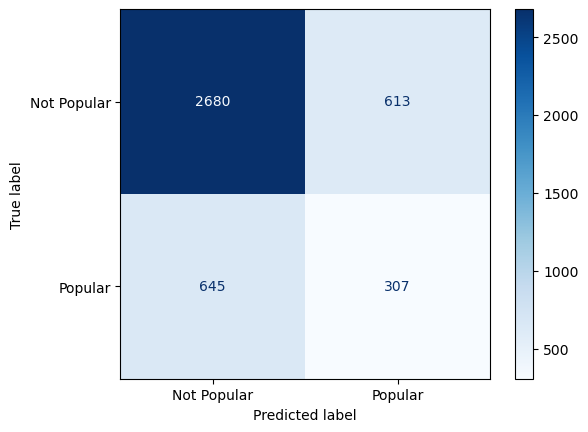

In [6]:
# outputs model's classification report and confusion matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

labels = ['Not Popular', 'Popular']
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('\nClassification Report :')
report = classification_report(y_test, y_pred, target_names=labels)
print(report)

print('Confusion Matrix :')
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues', values_format='d')
plt.show()

### Random Forest

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# split data into training and testing with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

# create random forest classifier
rf_model = RandomForestClassifier()

# fit model to data
rf_model.fit(X_train, y_train)

# get predicted data based on model
y_pred = rf_model.predict(X_test)

Model accuracy score: 0.7743

Classification Report :
              precision    recall  f1-score   support

 Not Popular       0.78      0.98      0.87      3293
     Popular       0.48      0.06      0.11       952

    accuracy                           0.77      4245
   macro avg       0.63      0.52      0.49      4245
weighted avg       0.71      0.77      0.70      4245

Confusion Matrix :


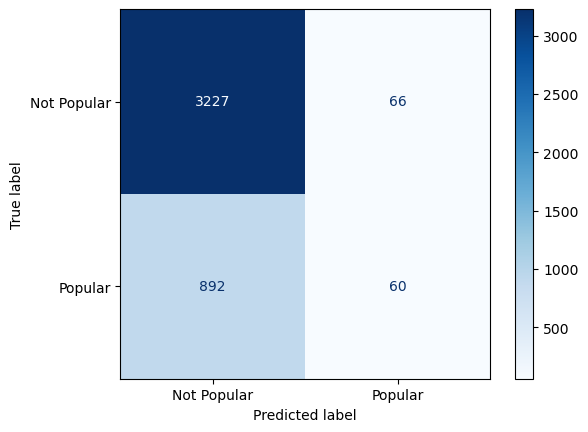

In [8]:
# outputs model's classification report and confusion matrix

labels = ['Not Popular', 'Popular']
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('\nClassification Report :')
report = classification_report(y_test, y_pred, target_names=labels)
print(report)

print('Confusion Matrix :')
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues', values_format='d')
plt.show()

### K-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split data into training and testing with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

# create model for k-nearest neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# get predicted data based on model
y_pred = knn_model.predict(X_test)

Model accuracy score: 0.7274

Classification Report :
              precision    recall  f1-score   support

 Not Popular       0.79      0.89      0.83      3293
     Popular       0.31      0.17      0.22       952

    accuracy                           0.73      4245
   macro avg       0.55      0.53      0.53      4245
weighted avg       0.68      0.73      0.70      4245

Confusion Matrix :


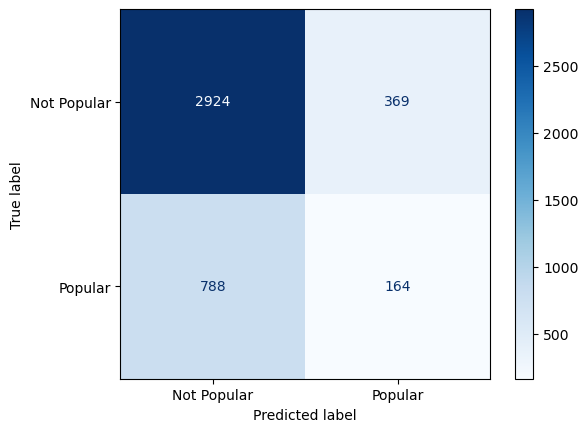

In [10]:
# outputs model's classification report and confusion matrix

labels = ['Not Popular', 'Popular']
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('\nClassification Report :')
report = classification_report(y_test, y_pred, target_names=labels)
print(report)

print('Confusion Matrix :')
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues', values_format='d')
plt.show()

### Linear SVM

In [11]:
import numpy as np
from sklearn.svm import SVC

class LinearSVM:
    def __init__(self, learning_rate=0.001, epochs=10000, C=1.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.C = C
        self.weights = None
        self.bias = None
        
    def train(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(num_samples):
                pred = np.dot(X[i], self.weights) - self.bias
                condition = y[i] * pred > 0
                if not condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

In [12]:
y_binary = np.where(y == 0, -1, 1)
# print(y_binary)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

svm_model = LinearSVM()
svm_model.train(X_train, y_train)

KeyError: 0

In [ ]:
y_pred = svm_model.predict(X_train)
# print("Predictions:", y_pred)

accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

In [ ]:
y_pred = svm_model.predict(X_test)
# print("Predictions:", y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")